#📌 Extracão

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Oculta os warnings
warnings.filterwarnings('ignore')


In [3]:
url = df = pd.read_json('/content/TelecomX_Data.json')
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
colunas = list(df.columns)
colunas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [6]:
from pandas import json_normalize

In [7]:
#Desaninhar a coluna 'customer'
customer_df = json_normalize(df['customer'])
df = pd.concat([df, customer_df], axis=1)
df.drop('customer', axis=1, inplace=True)

In [8]:
#Desaninhar a coluna 'phone'
phone_df = json_normalize(df['phone'])
df = pd.concat([df, phone_df], axis=1)
df.drop('phone', axis=1, inplace=True)


In [9]:
#Desaninhar a coluna 'internet'
internet_df = json_normalize(df['internet'])
df = pd.concat([df, internet_df], axis=1)
df.drop('internet', axis=1, inplace=True)

In [10]:
#Desaninhar a coluna 'account'
account_df = json_normalize(df['account'])
df = pd.concat([df, account_df], axis=1)
df.drop('account', axis=1, inplace=True)

In [11]:
#Exibir as primeiras linhas desaninhadas
print("\nPrimeiras linhas do DataFrame desaninhado:")
print(df.head())


Primeiras linhas do DataFrame desaninhado:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes

In [12]:
#Remover as informações vazias
display(df.info())
df = df.dropna()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

#🔧 Transformação

In [13]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [14]:
print("\nNúmero de linhas duplicadas:"),
print(df.duplicated().sum())



Número de linhas duplicadas:
0


In [15]:
display(df.describe())

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [16]:
#Verificar inconsistências nas categorias
print("\nValores únicos na coluna 'gender':", df['gender'].unique())


Valores únicos na coluna 'gender': ['Female' 'Male']


In [17]:
#Identificar colunas categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns

In [18]:
#Verificar valores únicos em cada coluna categórica
print("\nValores únicos em cada coluna categórica:")
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(df[coluna].unique())


Valores únicos em cada coluna categórica:

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: gender
['Female' 'Male']

Coluna: Partner
['Yes' 'No']

Coluna: Dependents
['Yes' 'No']

Coluna: PhoneService
['Yes' 'No']

Coluna: MultipleLines
['No' 'Yes' 'No phone service']

Coluna: InternetService
['DSL' 'Fiber optic' 'No']

Coluna: OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: TechSupport
['Yes' 'No' 'No internet service']

Coluna: StreamingTV
['Yes' 'No' 'No internet service']

Coluna: StreamingMovies
['No' 'Yes' 'No internet service']

Coluna: Contract
['One year' 'Month-to-month' 'Two year']

Coluna: PaperlessBilling
['Yes' 'No']

Coluna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Coluna: Charges.Tota

In [19]:
# Dicionários de mapeamento para as traduções
map_churn = {'Yes': 'Sim', 'No': 'Não'}
map_gender = {'Female': 'Feminino', 'Male': 'Masculino'}
map_partner = {'Yes': 'Sim', 'No': 'Não'}
map_dependents = {'Yes': 'Sim', 'No': 'Não'}
map_phone_service = {'Yes': 'Sim', 'No': 'Não'}
map_multiple_lines = {'No phone service': 'Sem serviço telefônico', 'No': 'Não', 'Yes': 'Sim'}
map_internet_service = {'DSL': 'DSL', 'Fiber optic': 'Fibra ótica', 'No': 'Não'}
map_online_security = {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_online_backup = {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_device_protection = {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_tech_support = {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_streaming_tv =  {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_streaming_movies =  {'No internet service': 'Sem serviço de internet', 'No': 'Não', 'Yes': 'Sim'}
map_contract = {'Month-to-month': 'Mês a mês', 'One year': 'Um ano', 'Two year': 'Dois anos'}
map_paperless_billing = {'Yes': 'Sim', 'No': 'Não'}
map_payment_method = {'Electronic check': 'Cheque eletrônico', 'Mailed check': 'Cheque por correio', 'Bank transfer (automatic)': 'Transferência bancária (automática)', 'Credit card (automatic)': 'Cartão de crédito (automático)'}

In [20]:
# Aplicar as traduções
df['Churn'] = df['Churn'].replace(map_churn)
df['gender'] = df['gender'].replace(map_gender)
df['Partner'] = df['Partner'].replace(map_partner)
df['Dependents'] = df['Dependents'].replace(map_dependents)
df['PhoneService'] = df['PhoneService'].replace(map_phone_service)
df['MultipleLines'] = df['MultipleLines'].replace(map_multiple_lines)
df['InternetService'] = df['InternetService'].replace(map_internet_service)
df['OnlineSecurity'] = df['OnlineSecurity'].replace(map_online_security)
df['OnlineBackup'] = df['OnlineBackup'].replace(map_online_backup)
df['DeviceProtection'] = df['DeviceProtection'].replace(map_device_protection)
df['TechSupport'] = df['TechSupport'].replace(map_tech_support)
df['StreamingTV'] = df['StreamingTV'].replace(map_streaming_tv)
df['StreamingMovies'] = df['StreamingMovies'].replace(map_streaming_movies)
df['Contract'] = df['Contract'].replace(map_contract)
df['PaperlessBilling'] = df['PaperlessBilling'].replace(map_paperless_billing)
df['PaymentMethod'] = df['PaymentMethod'].replace(map_payment_method)


In [21]:
#Exibir os valores únicos das colunas traduzidas para verificação
print("\nValores únicos após tradução:")
for coluna in ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    print(f"\nColuna: {coluna}")
    print(df[coluna].unique())


Valores únicos após tradução:

Coluna: Churn
['Não' 'Sim' '']

Coluna: gender
['Feminino' 'Masculino']

Coluna: Partner
['Sim' 'Não']

Coluna: Dependents
['Sim' 'Não']

Coluna: PhoneService
['Sim' 'Não']

Coluna: MultipleLines
['Não' 'Sim' 'Sem serviço telefônico']

Coluna: InternetService
['DSL' 'Fibra ótica' 'Não']

Coluna: OnlineSecurity
['Não' 'Sim' 'Sem serviço de internet']

Coluna: OnlineBackup
['Sim' 'Não' 'Sem serviço de internet']

Coluna: DeviceProtection
['Não' 'Sim' 'Sem serviço de internet']

Coluna: TechSupport
['Sim' 'Não' 'Sem serviço de internet']

Coluna: StreamingTV
['Sim' 'Não' 'Sem serviço de internet']

Coluna: StreamingMovies
['Não' 'Sim' 'Sem serviço de internet']

Coluna: Contract
['Um ano' 'Mês a mês' 'Dois anos']

Coluna: PaperlessBilling
['Sim' 'Não']

Coluna: PaymentMethod
['Cheque por correio' 'Cheque eletrônico' 'Cartão de crédito (automático)'
 'Transferência bancária (automática)']


In [22]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um ano,Sim,Cheque por correio,65.6,593.3
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mês a mês,Não,Cheque por correio,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,...,Não,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque por correio,83.9,267.4


#📊 Carga e análise

In [23]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


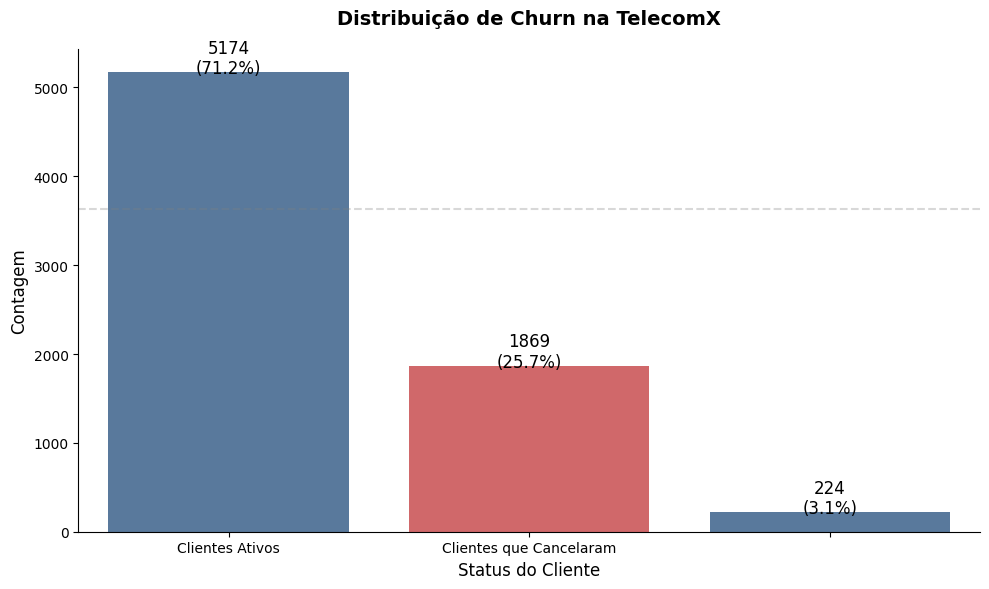

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df, palette=['#4e79a7','#e15759'])

sns.despine(top=True, right=True)

plt.title('Distribuição de Churn na TelecomX', fontsize=14, pad=18, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])

total = len(df)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

plt.axhline(y=total/2, color='gray', linestyle='--', alpha=0.3)

warnings.filterwarnings('ignore')

plt.tight_layout()
plt.show()

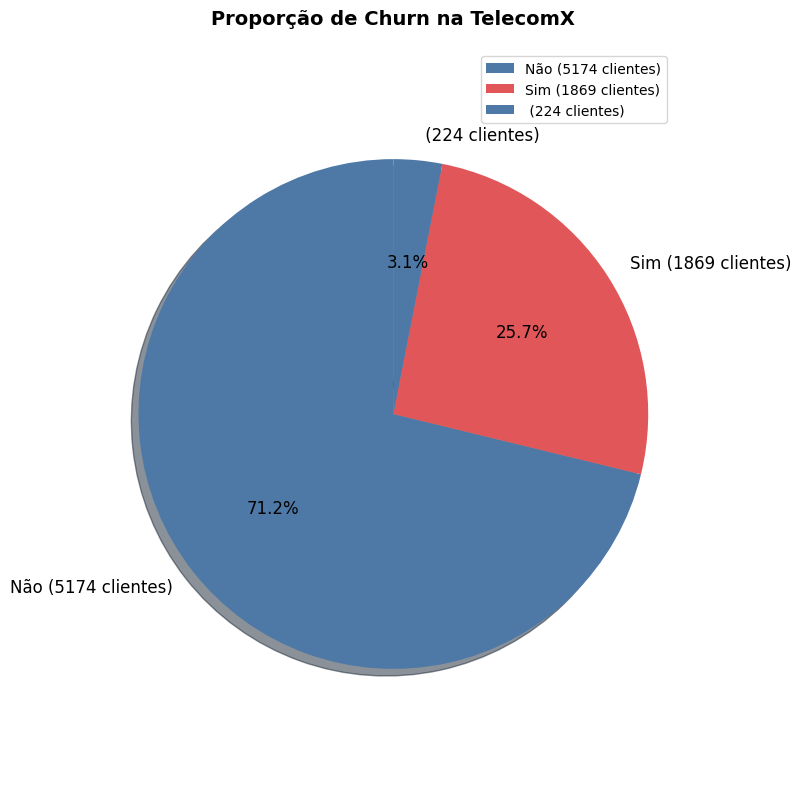

In [53]:
churn_counts = df['Churn'].value_counts()
labels = [f'{status} ({count} clientes)' for status, count in zip(churn_counts.index, churn_counts.values)]
colors = ['#4e79a7', '#e15759'][:len(churn_counts)]
explode = (0, 0.1) if len(churn_counts) == 2 else (0,) * len(churn_counts)

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90, shadow=True,
        textprops={'fontsize': 12})

plt.title('Proporção de Churn na TelecomX', fontsize=14, pad=18, fontweight='bold')
plt.axis('equal')

plt.legend(labels, loc='upper right')

plt.tight_layout()
plt.show()




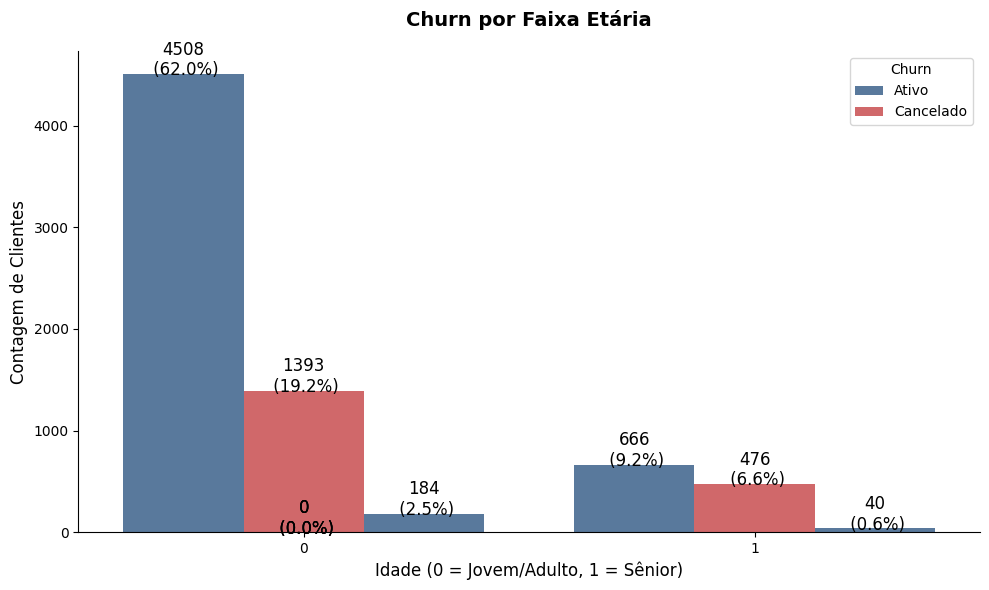

In [54]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df,
                  palette=['#4e79a7','#e15759'])

sns.despine(top=True, right=True)
plt.title('Churn por Faixa Etária', fontsize=14, pad=18, fontweight='bold')
plt.xlabel('Idade (0 = Jovem/Adulto, 1 = Sênior)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)

total = len(df)

for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n ({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

plt.legend(title='Churn', labels=['Ativo', 'Cancelado'], loc='upper right')

plt.tight_layout()
plt.show()

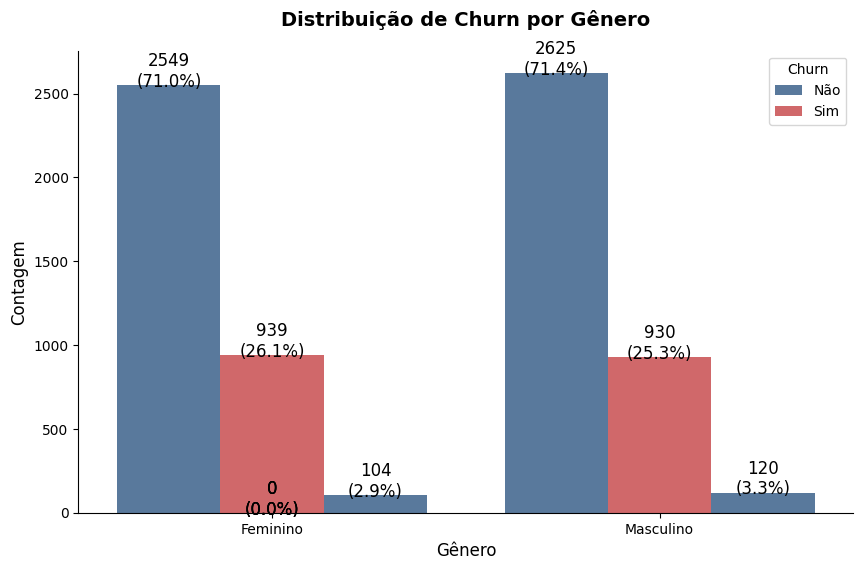

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df, palette=['#4e79a7','#e15759'])

sns.despine(top=True, right=True)

plt.title('Distribuição de Churn por Gênero', fontsize=14, pad=18, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

totals = df['gender'].value_counts().sort_index().values

for i, p in enumerate(ax.patches):

    gender_index = i % len(totals)
    percentage = f'{100*p.get_height()/totals[gender_index]:.1f}%'
    ax.annotate(text=f'{int(p.get_height())}\n({percentage})',
                xy=(p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

#📄Relatorio Final